# Decision Tree

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from david.textToSpeech import say

### Import data

In [61]:
X_train_s = np.load('data/X_train_s.npy')
X_test_s = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

feature_names = np.load('data/feature_names.npy')

### Parameter Optimization

In [7]:
def calc_params(X, y, clf, param_values, param_name, K, verbose=False):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
        if (verbose):
            s = "{} {:.3f} train {:.3f} test {:.3f}"
            print(s.format(param_name, param_value, train_scores[i], test_scores[i]))
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.grid(True)

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

### n_estimators

The number of trees in the forest.

In [13]:
rf = RandomForestClassifier(random_state=33, n_jobs=-1)

param_range = range(1,31)

%time train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'n_estimators', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

n_estimators 1.000 train 0.973 test 0.925
n_estimators 2.000 train 0.975 test 0.935
n_estimators 3.000 train 0.990 test 0.948
n_estimators 4.000 train 0.990 test 0.950
n_estimators 5.000 train 0.995 test 0.954
n_estimators 6.000 train 0.994 test 0.955
n_estimators 7.000 train 0.997 test 0.956
n_estimators 8.000 train 0.996 test 0.958
n_estimators 9.000 train 0.998 test 0.958
n_estimators 10.000 train 0.997 test 0.959
n_estimators 11.000 train 0.998 test 0.959
n_estimators 12.000 train 0.998 test 0.960
n_estimators 13.000 train 0.999 test 0.960
n_estimators 14.000 train 0.998 test 0.960
n_estimators 15.000 train 0.999 test 0.960
n_estimators 16.000 train 0.999 test 0.960
n_estimators 17.000 train 0.999 test 0.960
n_estimators 18.000 train 0.999 test 0.961
n_estimators 19.000 train 0.999 test 0.960
n_estimators 20.000 train 0.999 test 0.961
n_estimators 21.000 train 0.999 test 0.961
n_estimators 22.000 train 0.999 test 0.961
n_estimators 23.000 train 1.000 test 0.961
n_estimators 24.000 

KeyboardInterrupt: 

NameError: name 'test_scores' is not defined

### max_depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

max_depth 1.000 train 0.846 test 0.846
max_depth 2.000 train 0.849 test 0.849
max_depth 3.000 train 0.883 test 0.882
max_depth 4.000 train 0.910 test 0.910
max_depth 5.000 train 0.921 test 0.921
max_depth 6.000 train 0.927 test 0.927
max_depth 7.000 train 0.934 test 0.933
max_depth 8.000 train 0.938 test 0.937
max_depth 9.000 train 0.944 test 0.941
max_depth 10.000 train 0.949 test 0.945
max_depth 11.000 train 0.956 test 0.950
max_depth 12.000 train 0.962 test 0.954
max_depth 13.000 train 0.967 test 0.956
max_depth 14.000 train 0.972 test 0.958
max_depth 15.000 train 0.977 test 0.959
max_depth 16.000 train 0.981 test 0.959
max_depth 17.000 train 0.985 test 0.961
max_depth 18.000 train 0.988 test 0.960
max_depth 19.000 train 0.991 test 0.961
max_depth 20.000 train 0.993 test 0.960
max_depth 21.000 train 0.995 test 0.961
max_depth 22.000 train 0.996 test 0.961
max_depth 23.000 train 0.997 test 0.961
max_depth 24.000 train 0.997 test 0.961
max_depth 25.000 train 0.998 test 0.961
max_depth

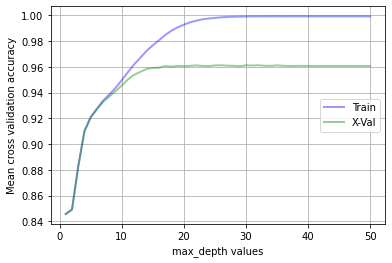

In [17]:
rf = RandomForestClassifier(n_estimators=20, random_state=33, n_jobs=-1)

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'max_depth', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

### min_samples_split

The minimum number of samples required to split an internal node:
* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


min_samples_split 2.000 train 0.999 test 0.961
min_samples_split 3.000 train 0.998 test 0.961
min_samples_split 4.000 train 0.996 test 0.961
min_samples_split 5.000 train 0.994 test 0.961
min_samples_split 6.000 train 0.991 test 0.961
min_samples_split 7.000 train 0.989 test 0.961
min_samples_split 8.000 train 0.987 test 0.961
min_samples_split 9.000 train 0.985 test 0.961
min_samples_split 10.000 train 0.984 test 0.961
min_samples_split 11.000 train 0.983 test 0.961
min_samples_split 12.000 train 0.982 test 0.962
min_samples_split 13.000 train 0.980 test 0.962
min_samples_split 14.000 train 0.979 test 0.962
min_samples_split 15.000 train 0.978 test 0.961
min_samples_split 16.000 train 0.977 test 0.961
min_samples_split 17.000 train 0.976 test 0.961
min_samples_split 18.000 train 0.976 test 0.962
min_samples_split 19.000 train 0.975 test 0.962
min_samples_split 20.000 train 0.975 test 0.961
min_samples_split 21.000 train 0.974 test 0.961
min_samples_split 22.000 train 0.973 test 0.961


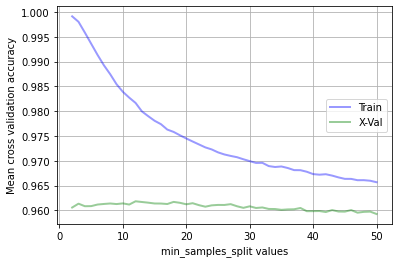

In [18]:
rf = RandomForestClassifier(n_estimators=20, random_state=33, n_jobs=-1)

param_range = range(2,51)

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'min_samples_split', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

### min_samples_leaf

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


min_samples_leaf 1.000 train 0.999 test 0.961
min_samples_leaf 2.000 train 0.991 test 0.961
min_samples_leaf 3.000 train 0.983 test 0.960
min_samples_leaf 4.000 train 0.978 test 0.961
min_samples_leaf 5.000 train 0.974 test 0.960
min_samples_leaf 6.000 train 0.972 test 0.959
min_samples_leaf 7.000 train 0.969 test 0.958
min_samples_leaf 8.000 train 0.968 test 0.958
min_samples_leaf 9.000 train 0.966 test 0.958
min_samples_leaf 10.000 train 0.965 test 0.956
min_samples_leaf 11.000 train 0.964 test 0.956
min_samples_leaf 12.000 train 0.962 test 0.955
min_samples_leaf 13.000 train 0.962 test 0.955
min_samples_leaf 14.000 train 0.961 test 0.954
min_samples_leaf 15.000 train 0.960 test 0.954
min_samples_leaf 16.000 train 0.960 test 0.955
min_samples_leaf 17.000 train 0.958 test 0.953
min_samples_leaf 18.000 train 0.958 test 0.953
min_samples_leaf 19.000 train 0.957 test 0.952
min_samples_leaf 20.000 train 0.957 test 0.952
min_samples_leaf 21.000 train 0.956 test 0.952
min_samples_leaf 22.00

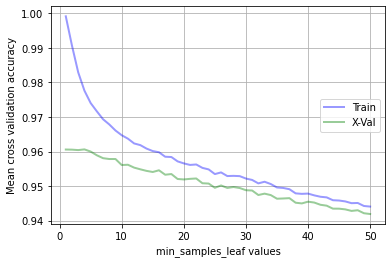

In [19]:
rf = RandomForestClassifier(n_estimators=20, random_state=33, n_jobs=-1)

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'min_samples_leaf', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

### max_leaf_nodes

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [30]:
rf = RandomForestClassifier(n_estimators=20, random_state=33, n_jobs=-1)

param_range = range(2,50)

train_scores, test_scores = calc_params(X_train_s, y_train, rf, param_range, 'max_leaf_nodes', 5, verbose=True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

ccp_alpha 0.010 train 0.879 test 0.878
ccp_alpha 0.030 train 0.856 test 0.856
ccp_alpha 0.050 train 0.852 test 0.852
ccp_alpha 0.070 train 0.846 test 0.846
ccp_alpha 0.090 train 0.844 test 0.844
ccp_alpha 0.110 train 0.837 test 0.837
ccp_alpha 0.130 train 0.787 test 0.787


KeyboardInterrupt: 

In [33]:
say('The task is complete.')

In [31]:
rf = RandomForestClassifier(n_estimators=20, random_state=33, n_jobs=-1)

# parameter values to be optimized for
parameters = {
    'max_depth': [*range(15, 26)],
    'min_samples_split' : [*range(10, 21)],
    'min_samples_leaf' : [*range(4, 10)],
#    'max_leaf_nodes' : [*range(187, 192)],
    'class_weight' : [None, 'balanced'],
    'criterion': ['entropy', 'gini']
}

# GridSearch finds the best combination of paramters
#tree_gs = GridSearchCV(dt, parameters, verbose=3, cv=3, scoring='accuracy', n_jobs=-1, return_train_score=False)
tree_gs = RandomizedSearchCV(rf, parameters, verbose=3, cv=3, n_iter=5000, scoring='accuracy', n_jobs=-1, return_train_score=False)

In [32]:
%time tree_gs.fit(X_train_s, y_train) # performs gridsearch
print(tree_gs.best_params_)
print("RMSE (test): {:.4f}".format(tree_gs.best_score_))

Fitting 3 folds for each of 2904 candidates, totalling 8712 fits


/Users/davidmaciulis/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 2904 is smaller than n_iter=5000. Running 2904 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 3856 t

CPU times: user 40.8 s, sys: 14.1 s, total: 54.9 s
Wall time: 1h 25min 32s
{'min_samples_split': 13, 'min_samples_leaf': 4, 'max_depth': 25, 'criterion': 'entropy', 'class_weight': None}
RMSE (test): 0.9601


array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99, 1.02, 1.04, 1.06, 1.08, 1.1 ,
       1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 , 1.32,
       1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52, 1.54,
       1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74, 1.76,
       1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96, 1.98,
       2.  ])

In [34]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [35]:
measure_performance(X_test_s, y_test, tree_gs, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.961 

Classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14675
           1       0.97      0.94      0.95     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898
 

Confussion matrix
[[14372   303]
 [  696 10527]] 



In [59]:
rf = RandomForestClassifier( min_samples_split=13, 
                             min_samples_leaf=4, 
                             max_depth=25, 
                             criterion='entropy', 
                             class_weight=None,
                             n_estimators=50,
                             n_jobs=-1)

fit = rf.fit(X_train_s, y_train)
train_eval_score = rf.score(X_train_s, y_train)
test_eval_score = rf.score(X_test_s, y_test)

print("Evaluation scores Train {:.3f} Test {:.3f}".format(train_eval_score, test_eval_score))

Evaluation scores Train 0.976 Test 0.962


<BarContainer object of 27 artists>

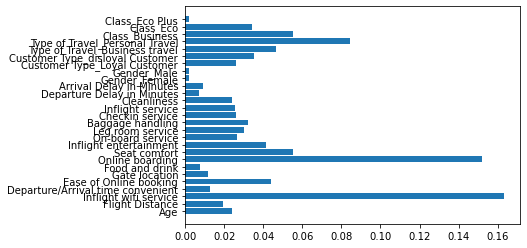

In [65]:
p = rf.feature_importances_.argsort()

array([0.00191667, 0.00198309, 0.00214074, 0.00719968, 0.00773958,
       0.00906104, 0.01174556, 0.01280163, 0.01917388, 0.02412562,
       0.02415907, 0.0253554 , 0.02607725, 0.02609806, 0.0265195 ,
       0.02993856, 0.03239293, 0.0340565 , 0.03540163, 0.04152392,
       0.04393271, 0.04675146, 0.05496099, 0.05515825, 0.0844121 ,
       0.15207099, 0.16330318])

array(['Gender_Male', 'Gender_Female', 'Class_Eco Plus',
       'Departure Delay in Minutes', 'Food and drink',
       'Arrival Delay in Minutes', 'Gate location',
       'Departure/Arrival time convenient', 'Flight Distance',
       'Cleanliness', 'Age', 'Inflight service', 'Checkin service',
       'Customer Type_Loyal Customer', 'On-board service',
       'Leg room service', 'Baggage handling', 'Class_Eco',
       'Customer Type_disloyal Customer', 'Inflight entertainment',
       'Ease of Online booking', 'Type of Travel_Business travel',
       'Seat comfort', 'Class_Business', 'Type of Travel_Personal Travel',
       'Online boarding', 'Inflight wifi service'], dtype='<U33')

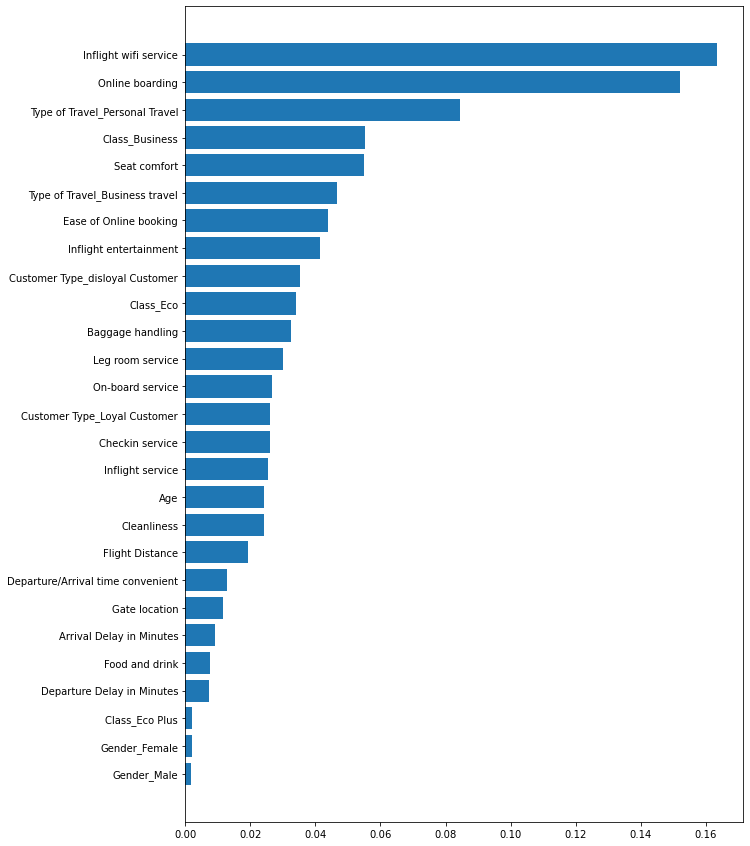

In [72]:
plt.figure(figsize=(10,15))
plt.barh(feature_names[p], rf.feature_importances_[p]);
